# V1: Python string parsiranje


Za danas:
 * pisati Jupyter bilježnice uz Python i MarkDown
 * ponoviti osnovne strukture podataka iz Pythona
 * manipulacije sa stringovima u Pythonu
 * dolaženje do tekstualnih informacija scrapping (struganjem :-) )  weba 

# Pripreme
Što je potrebno za rad s Jupyterom za početak?
1. Python [TutorialPoint's Python 3 tutorial](https://www.tutorialspoint.com/python3/)
2. Markdown [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#links)

## 1.1 Tipovi podataka

Ponovimo ukratko na primjeru različite tipove podataka koje Python podržava!


In [1]:
# tipovi podataka
x=[3+4j,'3+4j', 3, 4j, {4:3j}, 4.3, "3+4j", [3,5], [4j],(1,2)]

for i in x:
    print(type(i))

# ekplicitno pretvaranje tipova
int('2018')+1 # ?
str(2017)+'1' # ?
list('mathos osijek zagreb') # ?
'mathos osijek'.count('s') # ?



<class 'complex'>
<class 'str'>
<class 'int'>
<class 'complex'>
<class 'dict'>
<class 'float'>
<class 'str'>
<class 'list'>
<class 'list'>
<class 'tuple'>


2

Niz znakova (od sada ćemo najčešće koristiti engleski naziv: string) je niz __Unicode__ znakova kojima je tip podatka `str`.

## Složene strukture podataka
Strukture podataka u Pythonu: lista, nterac, rječnik, stringovi

**Primjer**: Dušične baze u DNK (guanin - citozin (G-C), adenin - timin (A - C))


In [2]:
list('TCAGTTAT')
set('TCAGTTAT')
tuple('TCAG')
dict((('A', 'adenin'), ('C', 'citozin'), ('G', 'gvanin'), ('T','timin')))

{'A': 'adenin', 'C': 'citozin', 'G': 'gvanin', 'T': 'timin'}

## Python funkcije

Prikazati u Pythonu funkciju $$ f(t)=A\cdot e^{-\alpha t} \cdot \sin{\omega t} $$ koja za $A=1,\alpha = 1, \omega=2\pi$ u intervalu $0\leq t \leq 7$.


In [3]:
from math import pi, exp, sin

# definicija funkcije s više pozicijskih parametara
def f(t,A=1,a=1,omega=2*pi):
    return A*exp(-a*t)*sin(omega*t)

# poziv funkcije s jednim ili više argumenata
v1 = f(0.2)
v2 = f(0.2, omega=1)
v3 = f(1, A=5, omega=pi, a=pi**2)
v4 = f(A=5, a=2, t=0.01, omega=0.1)
v5 = f(0.2, 0.5, 1, 1)

print('v1=',v1)
print('v2=',v2)
print('v3=',v3)
print('v4=',v4)
print('v5=',v5)

print('-'*30)


v1= 0.778659217806053
v2= 0.16265669081533915
v3= 3.167131721310066e-20
v4= 0.00490099254970159
v5= 0.08132834540766957
------------------------------


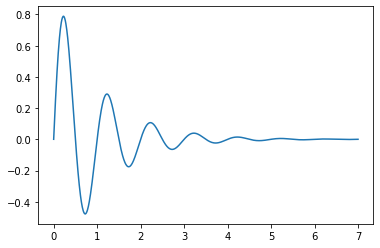

In [4]:
# crtanje grafa funkcije f
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# tocke za crtanje
x = np.linspace(0,7,num=1000)
_f = np.vectorize(f)
# crtanje funkcije
plt.plot(x,_f(x))
plt.show();


# Riječ - niz slova/znakova u rečenici
## Temeljna operacija: spajanje



In [5]:
s = "abcdefg"
s[1]
# s[1]="m"
w1 = "Ivan"
w2 = "Ivanu"
w3 = "voli"
lista = ["Ivan","voli","Ivanu"]
s1 = w1+" "+w3+" "+w2
s2 = w2+" "+w3+" "+w1
print(s1,s2)
" ".join(lista)

Ivan voli Ivanu Ivanu voli Ivan


'Ivan voli Ivanu'

## Temeljna operacija: razdvajanje (split)
_Pomoću kojih funkcija se razdvajaju stringovi i koje argumente mogu imati?_

In [6]:
# Rastavljanje stringova
# string.split(separator)
# string.splitlines()
recenica = 'Ovo je jednostavna recenica'
odlomak = u'''A ovo je jednostavan odlomak
6 koji ima 3 linije, tj. dva NewLine znaka pa se £ita
7 kao tri redka teksta. '''
tablica = "Ime:Mario; Zvanje:profesor; Rodjen:da :-)"
print(recenica.split())
print(odlomak.split())
print(odlomak.splitlines())
print(tablica.split(":"))
print(tablica.split(";"))

['Ovo', 'je', 'jednostavna', 'recenica']
['A', 'ovo', 'je', 'jednostavan', 'odlomak', '6', 'koji', 'ima', '3', 'linije,', 'tj.', 'dva', 'NewLine', 'znaka', 'pa', 'se', '£ita', '7', 'kao', 'tri', 'redka', 'teksta.']
['A ovo je jednostavan odlomak', '6 koji ima 3 linije, tj. dva NewLine znaka pa se £ita', '7 kao tri redka teksta. ']
['Ime', 'Mario; Zvanje', 'profesor; Rodjen', 'da ', '-)']
['Ime:Mario', ' Zvanje:profesor', ' Rodjen:da :-)']


## Temeljna operacija: potraga/zamjena (find/replace)
_Pomoću kojih funkcija se traže (pod)stringovi u nekom tekstu i koje argumente
mogu imati?_

In [7]:

s = "Ivan voli Ivanu, Ivan voli Mariju takodjer."
print('find:', s.find('Ivan'))
print('rfind:', s.rfind('Ivan'))
print('find:', s.find('Ivan',3))
print('index:', s.index('Ivan'))
print('rindex:', s.rindex('Ivan',2,15))
print('startswith:', s.startswith('Iv'))
print('endswith:', s.endswith('jer'))
print('replace:', s.replace("voli","ne voli"))
print('replaced:', s.replace("voli","nevoli",2))

find: 0
rfind: 17
find: 10
index: 0
rindex: 10
startswith: True
endswith: False
replace: Ivan ne voli Ivanu, Ivan ne voli Mariju takodjer.
replaced: Ivan nevoli Ivanu, Ivan nevoli Mariju takodjer.


# DEMO: Struganje web stranica

U ovom primjeru dohvatit ćemo leksičke informacije o imenicama iz mrežnog leksikona **hjp.znanje.hr**. Pretpostavit ćemo da je string imenica i želimo ispisati kojeg je roda i koju ima deklinaciju.

### Uvodni primjer

In [7]:
from bs4 import BeautifulSoup
import requests
import json 

# upit
word = 'ptica'

# HTTP interface 
url = 'https://hjp.znanje.hr/'
payload = {'word':word,'search':'Pretraga'}
result = requests.post(url+'index.php?show=search',data=payload)
content = result.content

# HTML code
#print(content)

# BS4 wrapper
soup = BeautifulSoup(content)

# kako izgleda tekst bez HTML oznaka
print(soup.body.get_text())

# pronadji gdje se nalazi upit uz pomoć dveloper alata u chrome-z
entries = soup.find_all('p',{"class":"libersina md"})

data = {}
for s in entries:
    word,_, data = s.text.strip().partition(' ') # no HTML tags
    print(word, ': ', data)
    #data[title] = url+s.find("a").attrs['href']
        
































Izbornik







Početna
O nama
Upute o čitanju rječničke baze
Povijest hrvatskoga jezika
Kontakt









Hrvatski jezični portal











Pronađeno je više natuknica koje odgovaraju zadanom uvjetu:




pȁtka ž 〈G mn -tākā/-ī〉  detaljnije




ptȉca ž 〈G mn ptȋcā〉  detaljnije





































Pomoć


Kratice i odrednice


Kratice i jezici


Znakovi


Kontakt


nakladni@znanje.hr


her@srce.hr




Libersina font
*Da biste ispravno vidjeli sadržaj rječnika, na svom računalu morate imati instaliran font Libersina©.


Preuzimanje













pȁtka :  ž 〈G mn -tākā/-ī〉  detaljnije
ptȉca :  ž 〈G mn ptȋcā〉  detaljnije


### HJP parser imenica

U ovom primjeru, dodatno parsiramo tekst koje smo dobili BeautifulSoup-om.



In [8]:
class HJP_parser:
    def __init__(self):
        # HTTP interface 
        self.url = 'https://hjp.znanje.hr/'    
                    
            
    def parse(self,word):
        payload = {'word':word,'search':'Pretraga'}
        result = requests.post(self.url+'index.php?show=search',data=payload)
        content = result.content 
        
        # BS4 wrapper
        soup = BeautifulSoup(content,'lxml')

        entries = soup.find_all('p',{"class":"libersina md"})
        
        lexicon = {}
        declination = {}
        
        tekst = entries[0].text.strip()
        imenica,_,line = tekst.partition(' ')
        rod,_,attr     = line.partition(' ')
        attr = attr.lstrip('〈').rstrip('〉').split(',')
        
        
        for a in attr:
            a = a.strip()
            if a.startswith('G mn '):
                gen_pl = a.split(' ')[2]
                declination['genitive plural'] = gen_pl
            elif a.startswith('G '):
                gen = a.split(' ')[1]
                declination['genitive'] = gen
            elif a.startswith('V '):
                voc = a.split(' ')[1]
                declination['vocative'] = voc
            elif a.startswith('N mn '):
                nom_pl = a.split(' ')[1]
                declination['nominative plural'] = nom_pl
            
                
                
        lexicon[imenica] = { 
            'lemma': imenica, 
            'type' : 'noun', 
            'gender' : rod, 
            'declination' : declination  
        }
        
        from pprint import pprint
        pprint(lexicon,sort_dicts=False)

In [9]:
import os
word = 'patka'
parser = HJP_parser()
parser.parse(word)


{'pȁtka': {'lemma': 'pȁtka',
           'type': 'noun',
           'gender': 'ž',
           'declination': {'genitive plural': '-tākā/-ī'}}}
